<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,88.479576,87.128752,-0.000205,185.608124,185.609402,-0.001278
1,0.0,1.0,72.361945,30.843561,-0.001216,113.204290,113.205103,-0.000813
2,0.0,2.0,48.670359,70.076269,-0.000741,128.745887,128.744957,0.000930
3,0.0,3.0,91.143672,75.143007,-0.001045,176.285634,176.287840,-0.002205
4,0.0,4.0,21.545550,57.602513,-0.000662,89.147400,89.144515,0.002885
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.515443,87.802855,0.001345,150.319642,150.318479,0.001162
29996,999.0,26.0,58.054354,72.511396,-0.000476,140.565275,140.566309,-0.001035
29997,999.0,27.0,70.248226,88.060066,0.001157,168.309449,168.307686,0.001762
29998,999.0,28.0,96.824930,50.743018,0.000010,157.567957,157.567687,0.000270


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    88.479576  87.128752 -0.000205  185.608124  185.609402 -0.001278
      1.0    72.361945  30.843561 -0.001216  113.204290  113.205103 -0.000813
      2.0    48.670359  70.076269 -0.000741  128.745887  128.744957  0.000930
      3.0    91.143672  75.143007 -0.001045  176.285634  176.287840 -0.002205
      4.0    21.545550  57.602513 -0.000662   89.147400   89.144515  0.002885
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.515443  87.802855  0.001345  150.319642  150.318479  0.001162
      26.0   58.054354  72.511396 -0.000476  140.565275  140.566309 -0.001035
      27.0   70.248226  88.060066  0.001157  168.309449  168.307686  0.001762
      28.0   96.824930  50.743018  0.000010  157.567957  157.567687  0.000270
      29.0   87.823795  38.835668  0.000755  136.660218  136.660079  0.000139

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    88.479576  87.128752 -0.000205  185.608124  185.609402 -0.001278
      1.0    72.361945  30.843561 -0.001216  113.204290  113.205103 -0.000813
      2.0    48.670359  70.076269 -0.000741  128.745887  128.744957  0.000930
      3.0    91.143672  75.143007 -0.001045  176.285634  176.287840 -0.002205
      4.0    21.545550  57.602513 -0.000662   89.147400   89.144515  0.002885
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.515443  87.802855  0.001345  150.319642  150.318479  0.001162
      26.0   58.054354  72.511396 -0.000476  140.565275  140.566309 -0.001035
      27.0   70.248226  88.060066  0.001157  168.309449  168.307686  0.001762
      28.0   96.824930  50.743018  0.000010  157.567957  157.567687  0.000270
      29.0   87.823795  38.835668  0.000755  136.660218  136.660079  0.000139

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,88.479576,87.128752,-0.000205,185.608124,185.609402,-0.001278
1,0.0,1.0,72.361945,30.843561,-0.001216,113.204290,113.205103,-0.000813
2,0.0,2.0,48.670359,70.076269,-0.000741,128.745887,128.744957,0.000930
3,0.0,3.0,91.143672,75.143007,-0.001045,176.285634,176.287840,-0.002205
4,0.0,4.0,21.545550,57.602513,-0.000662,89.147400,89.144515,0.002885
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.515443,87.802855,0.001345,150.319642,150.318479,0.001162
29996,999.0,26.0,58.054354,72.511396,-0.000476,140.565275,140.566309,-0.001035
29997,999.0,27.0,70.248226,88.060066,0.001157,168.309449,168.307686,0.001762
29998,999.0,28.0,96.824930,50.743018,0.000010,157.567957,157.567687,0.000270


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    88.479576  87.128752 -0.000205  185.608124  185.609402 -0.001278
      1.0    72.361945  30.843561 -0.001216  113.204290  113.205103 -0.000813
      2.0    48.670359  70.076269 -0.000741  128.745887  128.744957  0.000930
      3.0    91.143672  75.143007 -0.001045  176.285634  176.287840 -0.002205
      4.0    21.545550  57.602513 -0.000662   89.147400   89.144515  0.002885
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.515443  87.802855  0.001345  150.319642  150.318479  0.001162
      26.0   58.054354  72.511396 -0.000476  140.565275  140.566309 -0.001035
      27.0   70.248226  88.060066  0.001157  168.309449  168.307686  0.001762
      28.0   96.824930  50.743018  0.000010  157.567957  157.567687  0.000270
      29.0   87.823795  38.835668  0.000755  136.660218  136.660079  0.000139

[30000 rows x 6 columns]

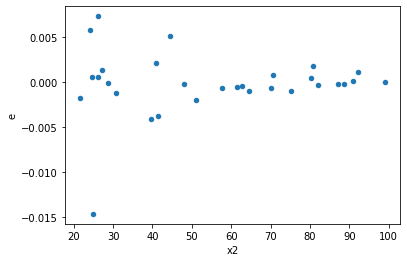

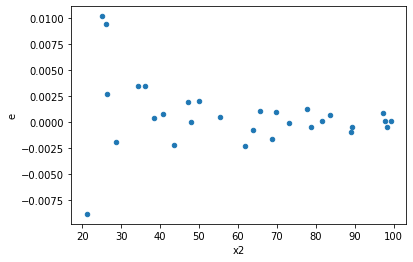

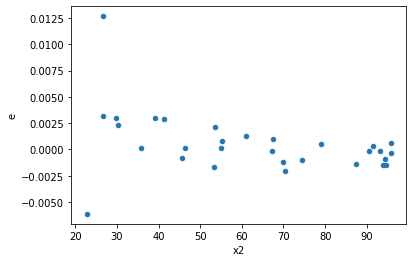

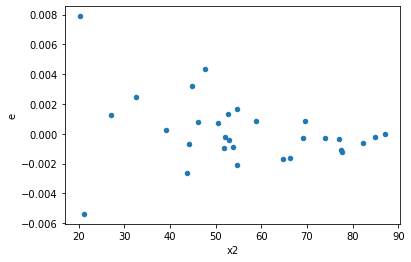

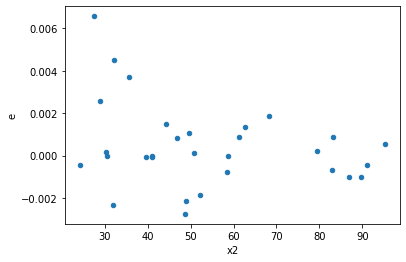

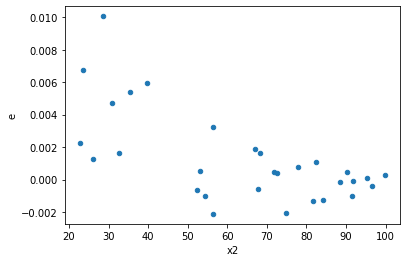

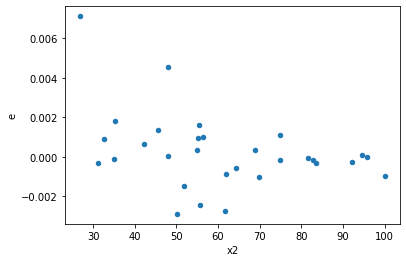

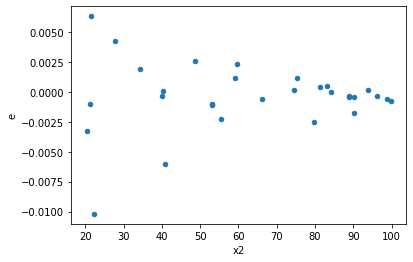

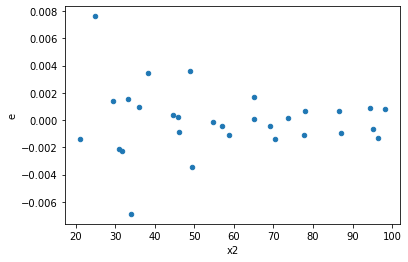

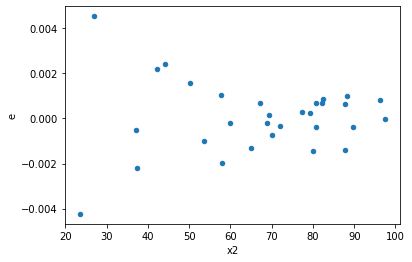

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,17.0,9.0,9.617851076739141e-05,0.0001882695545385852,5.657559456905377e-06,2.0918839393176133e-05,3.6975023510611957,0.05105543030161819,0.9744722848491909,0.025527715150809094,Reject001=1 : Homoscedasticity
2.0,13.0,13.0,1.3851499136356678e-05,0.00020234098695872665,1.0654999335658983e-06,1.5564691304517434e-05,14.607876372574921,2.2759428709440144e-05,0.9999886202856453,1.1379714354720072e-05,Reject001=0 : Heteroscedasticity
5.0,10.0,16.0,1.7055569455056438e-05,0.00010464005787817074,1.7055569455056437e-06,6.540003617385671e-06,3.834526683274575,0.0167672272093069,0.9916163863953465,0.00838361360465345,Reject001=1 : Homoscedasticity
6.0,13.0,13.0,2.1867116668895057e-05,4.970882299751494e-05,1.6820858976073122e-06,3.8237556151934566e-06,2.273222562909878,0.15186006930707885,0.9240699653464606,0.07593003465353942,Reject001=1 : Homoscedasticity
7.0,14.0,12.0,1.9276865967547785e-05,0.00021668143787923882,1.3769189976819846e-06,1.8056786489936567e-05,13.11390613415517,7.133575817408477e-05,0.999964332120913,3.566787908704239e-05,Reject001=0 : Heteroscedasticity
10.0,17.0,9.0,2.1654459573856215e-05,0.00012014481322088636,1.2737917396386008e-06,1.3349423691209596e-05,10.480067718916974,0.0011332165244313241,0.9994333917377843,0.0005666082622156621,Reject001=0 : Heteroscedasticity
11.0,10.0,16.0,8.789295717833725e-06,0.0001314931321727083,8.789295717833725e-07,8.218320760794268e-06,9.350374620026798,0.00011809156099285012,0.9999409542195036,5.904578049642506e-05,Reject001=0 : Heteroscedasticity
12.0,17.0,9.0,6.831659926532177e-05,4.3062826335780606e-05,4.0186234861953984e-06,4.784758481753401e-06,1.190646125020121,0.8179437132103182,0.5910281433948409,0.4089718566051591,Reject001=1 : Homoscedasticity
13.0,18.0,8.0,5.884240882455137e-06,0.00010881840726693602,3.269022712475076e-07,1.3602300908367003e-05,41.60968615011026,1.1540055556258366e-05,0.9999942299722219,5.770027778129183e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,9.0,0.00022867704322602483,8.571141279573777e-06,1.345159077800146e-05,9.523490310637531e-07,0.07079824585663215,6.018478215211944e-06,Reject001=0 : Heteroscedasticity
1.0,17.0,9.0,9.617851076739141e-05,0.0001882695545385852,5.657559456905377e-06,2.0918839393176133e-05,3.6975023510611957,0.05105543030161819,Reject001=1 : Homoscedasticity
2.0,13.0,13.0,1.3851499136356678e-05,0.00020234098695872665,1.0654999335658983e-06,1.5564691304517434e-05,14.607876372574921,2.2759428709440144e-05,Reject001=0 : Heteroscedasticity
3.0,12.0,14.0,0.0001334643324877759,8.01961315642052e-06,1.112202770731466e-05,5.728295111728943e-07,0.05150405359952122,8.462699696853177e-06,Reject001=0 : Heteroscedasticity
4.0,12.0,14.0,5.70444714778373e-05,3.3834314533737246e-05,4.753705956486442e-06,2.4167367524098034e-06,0.5083900381158749,0.2469693905129128,Reject001=1 : Homoscedasticity
5.0,10.0,16.0,1.7055569455056438e-05,0.00010464005787817074,1.7055569455056437e-06,6.540003617385671e-06,3.834526683274575,0.0167672272093069,Reject001=1 : Homoscedasticity
6.0,13.0,13.0,2.1867116668895057e-05,4.970882299751494e-05,1.6820858976073122e-06,3.8237556151934566e-06,2.273222562909878,0.15186006930707885,Reject001=1 : Homoscedasticity
7.0,14.0,12.0,1.9276865967547785e-05,0.00021668143787923882,1.3769189976819846e-06,1.8056786489936567e-05,13.11390613415517,7.133575817408477e-05,Reject001=0 : Heteroscedasticity
8.0,16.0,10.0,0.00015857079960325643,1.1184005838881008e-05,9.910674975203527e-06,1.1184005838881008e-06,0.1128480740904464,0.00016551235218937354,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    618
Reject001=1 : Homoscedasticity      382
Name: Result_test, dtype: int64